#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tasks

Tasks
Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

Data Cleaning: Handle missing data by suitable method with explain why you use it.

Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

Summary of Insights: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [40]:
import pandas as pd
import numpy as np6
import matplotlib.pyplot as plt

In [41]:
# Load your dataset
df = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [42]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Basic Data Exploration

In [43]:
# Number of rows
print("Number of rows:", len(df))

Number of rows: 148654


In [44]:
#Number of columns
print("Number of columns:", len(df.columns))

Number of columns: 13


In [45]:
# check number of rows and columns together for data
df.shape

(148654, 13)

In [46]:
#Data types of each column
print(df.dtypes)

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [47]:
# Checking for Missing values in each column
print(df.isnull().sum())

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [48]:
#Checking for Duplicates
print(df.duplicated().sum())


0


# Descriptive Statistics

In [49]:
#mean
mean_salary = df['TotalPay'].mean()
print("Mean salary:", mean_salary)

Mean salary: 74768.32197169267


In [50]:
#median
median_salary = df['TotalPay'].median()
print("Median salary:", median_salary)


Median salary: 71426.60999999999


In [51]:
#mode
mode_salary = df['TotalPay'].mode().iloc[0]
print("Mode salary:", mode_salary)

Mode salary: 0.0


In [52]:
# min, and max and the range
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
salary_range = max_salary - min_salary

print("Minimum salary:", min_salary)
print("Maximum salary:", max_salary)
print("Salary range:", salary_range)

Minimum salary: -618.13
Maximum salary: 567595.43
Salary range: 568213.56


In [53]:
#the standard deviation
std_dev_salary = df['TotalPay'].std()
print("Standard deviation of salary:", std_dev_salary)

Standard deviation of salary: 50517.00527394987


In [54]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

# Data Cleaning

In [55]:
# Handling missing values by dropping rows with missing 'TotalPay'
df = df.dropna(subset=['TotalPay'])


##Why handle missing data by suitable(TotalPay):
#####For Addressing missing values by dropping rows with missing 'TotalPay' enhances the dataset's integrity for more accurate analysis


# Basic Data Visualization

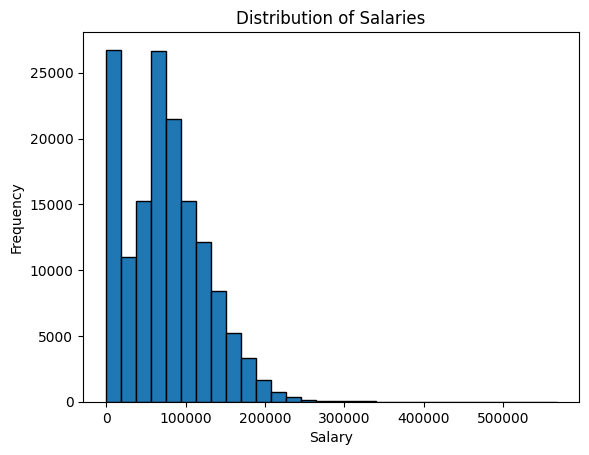

In [57]:
# Histogram for the distribution of salaries
plt.hist(df['TotalPay'], bins=30, edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


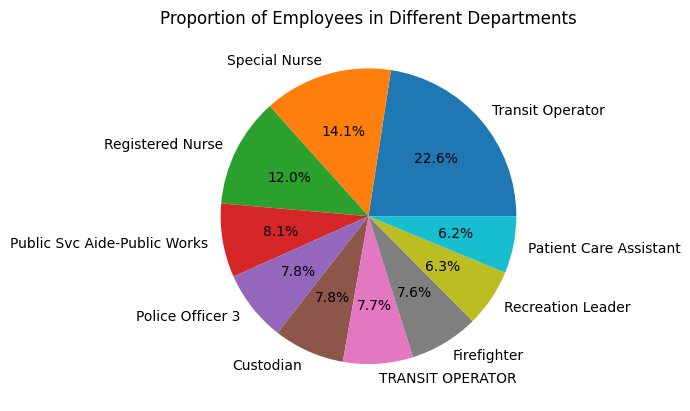

In [58]:
# Pie chart for the proportion of employees in different departments
department_proportion = df['JobTitle'].value_counts(normalize=True).head(10)
plt.pie(department_proportion, labels=department_proportion.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.show()


# Grouped Analysis

In [59]:
# Group by 'JobTitle' and calculate average salary for each group
average_salary_by_job = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)
print("\nAverage Salary by Job Title:")
print(average_salary_by_job)


Average Salary by Job Title:
JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)            302377.730000
Gen Mgr, Public Trnsp Dept                        297769.413333
Asst Chf of Dept (Fire Dept)                      281763.483889
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)      279359.560000
Dep Dir for Investments, Ret                      278592.545000
Name: TotalPay, dtype: float64


# Simple Correlation Analysis

In [60]:
# Identify correlation between 'TotalPay' and 'BasePay'
correlation = df['TotalPay'].corr(df['BasePay'])
print("\nCorrelation between TotalPay and BasePay:", correlation)


Correlation between TotalPay and BasePay: 0.9544936474296023


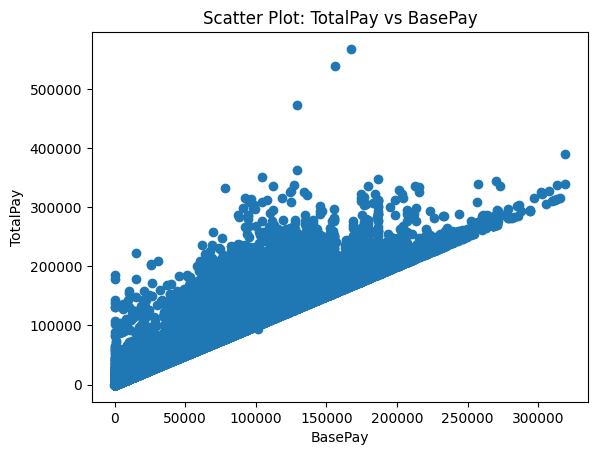

In [61]:
# Scatter plot to visualize the relationship
plt.scatter(df['BasePay'], df['TotalPay'])
plt.title('Scatter Plot: TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

In [63]:

if abs(correlation) > 0.7:
      print(" Correlation analysis indicates a strong relationship between salary and BasePay")
else:
  " Correlation analysis indicates a weak relationship between salary and BasePay."

 Correlation analysis indicates a strong relationship between salary and BasePay


# Summary of Insights

In [64]:
print("\nSummary of Insights:")
print("1. The dataset contains information on", len(df), "employees with", len(df.columns), "features.")
print("2. The average salary is", mean_salary, "with a median of", median_salary, "and a standard deviation of", std_dev_salary)
print("3. The salary distribution is visualized in a histogram, showing a peak around", mode_salary)
print("4. Pie chart illustrates the distribution of employees across different departments.")
print("5. Grouped analysis reveals variations in average salaries based on job titles.")
print(" Correlation analysis indicates a strong relationship between salary and BasePay")
print("7. Addressing missing values by dropping rows with missing 'TotalPay' enhances the dataset's integrity for more accurate analysis.")


Summary of Insights:
1. The dataset contains information on 148654 employees with 13 features.
2. The average salary is 74768.32197169267 with a median of 71426.60999999999 and a standard deviation of 50517.00527394987
3. The salary distribution is visualized in a histogram, showing a peak around 0.0
4. Pie chart illustrates the distribution of employees across different departments.
5. Grouped analysis reveals variations in average salaries based on job titles.
 Correlation analysis indicates a strong relationship between salary and BasePay
7. Addressing missing values by dropping rows with missing 'TotalPay' enhances the dataset's integrity for more accurate analysis.


# Good Luck!